In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
num_inputs = 2 #两个特征
num_examples = 1000 #总共一千条数据

In [3]:
np.random.seed(24) #设置随机数种子

In [4]:
np.random.randn(2,2)

array([[ 1.32921217, -0.77003345],
       [-0.31628036, -0.99081039]])

In [15]:
w_true = np.array([2,-1]).reshape(-1,1) # reshape(-1,1) 中的-1是自动判断数组中元素个数，而1是1列的意思
w_true

array([[ 2],
       [-1]])

In [8]:
b_true = np.array(1)

In [17]:
#扰动项相关
delta = 0.01

# 创建数据集的特征和标签取值
features = np.random.randn(num_examples,num_inputs)         #创建特征值一千行两列
labels_true = features.dot(w_true) + b_true                  #矩阵乘法，构建线性方程 y = 2x_1 - x_2 + 1
labels = labels_true + np.random.normal(size = labels_true.shape) * delta #创建随机噪声

In [11]:
features


array([[-1.07081626, -1.43871328],
       [ 0.56441685,  0.29572189],
       [-1.62640423,  0.2195652 ],
       ...,
       [-1.44029131,  0.50439425],
       [ 0.96604603,  1.76623359],
       [ 0.57852053, -1.34028424]])

In [12]:
features.shape

(1000, 2)

In [14]:
labels_true

array([[ 2.97080769e-01],
       [ 1.83311182e+00],
       [-2.47237367e+00],
       [ 4.68336867e-01],
       [ 2.81906560e+00],
       [-8.12559166e-01],
       [ 2.84911190e+00],
       [ 8.16104836e-01],
       [-2.23673251e+00],
       [ 3.84903763e+00],
       [ 3.57341849e-02],
       [-6.31876174e-01],
       [ 6.71457939e-01],
       [-2.91185026e-01],
       [ 5.69912892e+00],
       [ 5.94732168e+00],
       [ 1.08837176e-01],
       [-4.63796210e-01],
       [ 3.23817195e+00],
       [-3.74448288e+00],
       [ 2.94300273e+00],
       [ 9.09452631e-01],
       [-1.86514513e+00],
       [ 3.34061566e+00],
       [ 2.82759572e+00],
       [-2.68017804e-01],
       [ 1.18081099e+00],
       [-5.77104701e-01],
       [-1.86902545e-01],
       [ 4.59659037e+00],
       [ 2.91058551e+00],
       [-2.92879416e+00],
       [-2.24480799e+00],
       [ 7.42354926e-01],
       [ 4.96769843e-01],
       [-8.56161409e-01],
       [ 2.33995763e+00],
       [-2.68636701e+00],
       [-2.0

In [16]:
labels_true.shape

(1000, 1)

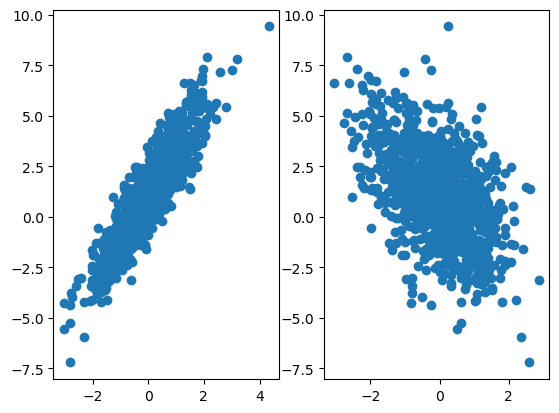

In [21]:
plt.subplot(121)
plt.scatter(features[:,0],labels)
plt.subplot(122)
plt.scatter(features[:,1],labels)

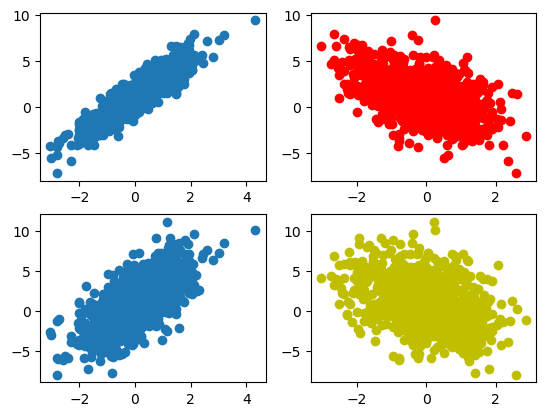

In [32]:
# 设置随机数种子
np.random.seed(24)

#修改因变量
labels1 = labels_true + np.random.normal(size = labels_true.shape) * 2
#扰动较小的情况
plt.subplot(221)
plt.scatter(features[:,0],labels)
plt.subplot(222)
plt.plot(features[:,1],labels,'ro')
#扰动较大的情况
plt.subplot(223)
plt.scatter(features[:,0],labels1)
plt.subplot(224)
plt.plot(features[:,1],labels1,'yo')

In [3]:
np.power([2,3],2)

array([4, 9], dtype=int32)

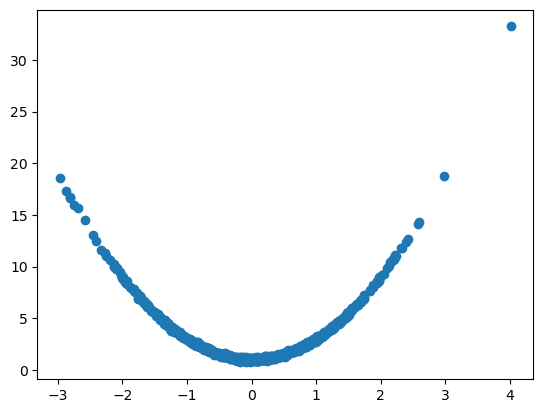

In [7]:
np.random.seed(24)

num_inputs = 1
num_examples = 1000

w_true = np.array(2)
b_true = np.array(1)

features = np.random.randn(num_examples,num_inputs)
labels_true = np.power(features,2) * w_true + b_true
labels = labels_true + np.random.normal(size = labels_true.shape) * 0.1

plt.scatter(features,labels)

In [8]:
A = np.arange(4).reshape(2,2)

In [9]:
A


array([[0, 1],
       [2, 3]])

In [11]:
B = A
B


array([[0, 1],
       [2, 3]])

In [12]:
A.dot(B)

array([[ 2,  3],
       [ 6, 11]])

In [13]:
A.dot(2)

array([[0, 2],
       [4, 6]])

In [21]:
def arrayGenReg(num_examples = 1000, w = [2,-1,1], bias = True, delta = 0.01, deg = 1):
    """回归类数据集创建函数。
    : num_examples: 创建数据集的数据量
    : w : 包括截距的(如果存在)特征系数向量
    : bias : 是否需要截距
    : delta : 扰动项取值
    : deg : 方程最高项系数
    : return : 生成的特征数组和标签数组
    """
    if bias == True:
        num_inputs = len(w) - 1
        features_true = np.random.randn(num_examples,num_inputs)
        w_true = np.array(w[:-1]).reshape(-1,1)
        b_true = np.array(w[-1]) #截距
        labels_true = np.power(features_true,deg).dot(w_true) + b_true
        features = np.concatenate((features_true,np.ones_like(labels_true)),axis = 1) #加上全为1的一列之后的特征值
    else:
        num_inputs = len(w)
        features = np.random.randn(num_examples,num_inputs)
        w_true = np.array(w).reshape(-1,1)
        labels_true = np.power(features,deg).dot(w_true)
    labels = labels_true + np.random.normal(size = labels_true.shape) * delta
    #labels_true.shape
    return features,labels

In [17]:
arrayGenReg()

(array([[-0.7440329 ,  0.5385396 ,  1.        ],
        [-0.45942659, -0.23805522,  1.        ],
        [-0.93318145,  0.5615154 ,  1.        ],
        ...,
        [-0.75823009,  0.54518512,  1.        ],
        [ 1.07220145,  2.03226322,  1.        ],
        [-0.38077427,  0.82833479,  1.        ]]),
 array([[-1.03920751e+00],
        [ 3.02751371e-01],
        [-1.41676789e+00],
        [ 3.45440704e+00],
        [ 9.76956538e-01],
        [ 2.48184953e+00],
        [ 1.44297126e+00],
        [ 1.54175126e+00],
        [-2.21450536e+00],
        [ 6.16565476e-01],
        [-5.54705720e-01],
        [ 2.16389899e+00],
        [ 3.64298463e+00],
        [-1.88391787e+00],
        [ 4.41052523e-01],
        [ 6.03396965e-01],
        [ 2.14916902e+00],
        [ 1.07558411e+00],
        [ 1.42118540e+00],
        [-6.17815422e-01],
        [ 1.03581494e+00],
        [ 5.97557117e-02],
        [-1.58483765e+00],
        [-1.60389082e+00],
        [-1.02192592e+00],
        [ 4.6630

In [20]:
np.random.seed(24)

f,l = arrayGenReg(delta = 0.01)
f

array([[ 1.32921217, -0.77003345,  1.        ],
       [-0.31628036, -0.99081039,  1.        ],
       [-1.07081626, -1.43871328,  1.        ],
       ...,
       [ 1.5507578 , -0.35986144,  1.        ],
       [-1.36267161, -0.61353562,  1.        ],
       [-1.44029131,  0.50439425,  1.        ]])

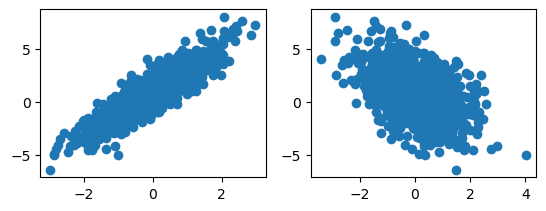

In [22]:
plt.subplot(223)
plt.scatter(f[:,0],l)
plt.subplot(224)
plt.scatter(f[:,1],l)